In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()

In [10]:
#feaures / input data
digits.data.shape

(1797, 64)

In [24]:
X = digits.data

In [25]:
y = digits.target

In [13]:
digits.target.shape

(1797,)

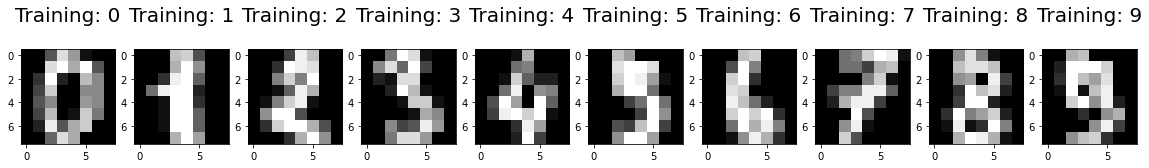

In [19]:
plt.figure(figsize =(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize =20)

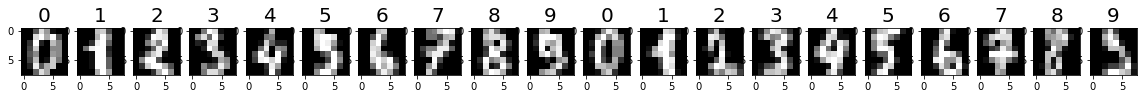

In [21]:
plt.figure(figsize =(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:20], digits.target[0:20])):
    plt.subplot(1, 20, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    #plt.title("Training: %i\n" % label, fontsize =20)
    plt.title(label, fontsize =20)

In [ ]:
#to know more about plt
#help(plt)

In [26]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [28]:
print("Train input data ", X_train.shape)
print("Test input data ", X_test.shape)
print("Y_train input data ", y_train.shape)
print("Y_test input data ", y_test.shape)

Train input data  (1437, 64)
Test input data  (360, 64)
Y_train input data  (1437,)
Y_test input data  (360,)


In [ ]:
#apply model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

In [36]:
model.predict(X_test[0:7])
predictions = model.predict(X_test)
predictions

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 9, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

### Accuracy Test

In [35]:
score = model.score(X_test, y_test)
score

0.9666666666666667

### Confustion Matrix

In [40]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

Text(0.5, 1.0, "('acuracy score : (0)', '0.9666666666666667')")

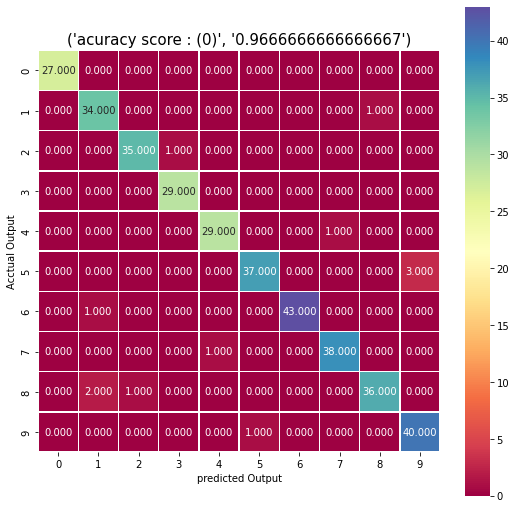

In [45]:
import seaborn as sns 
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt = ".3f" , linewidths = .5, square = True, cmap = 'Spectral');
plt.ylabel("Acctual Output")
plt.xlabel("predicted Output")
all_samples_title = "acuracy score : (0)", format(score)
plt.title(all_samples_title, size = 15)

#### if we change the test size then confusion matrix will change accordingly

In [ ]:
#print(cm)

In [64]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclasind = [index]
for label, predict in zip(y_test, predictions):
    if label != predict:
        misclasind.append(index)
        index +=1

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\asus\Anaconda3\envs\machine-learning\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Users\asus\Anaconda3\envs\machine-learning\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\asus\Anaconda3\envs\machine-learning\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\asus\Anaconda3\envs\machine-learning\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\asus\Anaconda3\envs\machine-learning\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\asus\Anaconda3\envs\machine-learning\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<

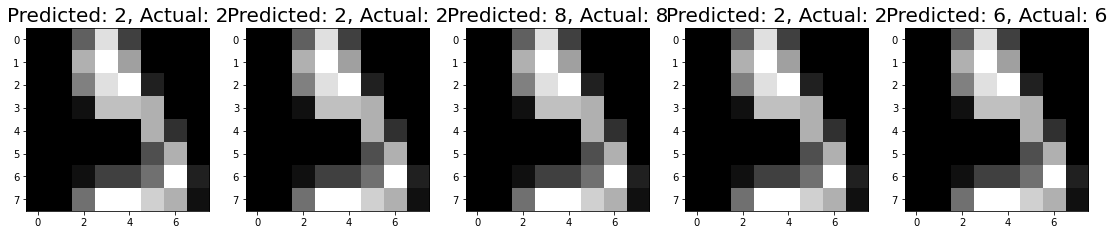

In [63]:
plt.figure(figsize =(20,4))
for plotindex, badindex in enumerate(misclasind[0:5]):
    plt.subplot(1, 5, plotindex + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    #plt.title("Training: %i\n" % label, fontsize =20)
    plt.title("Predicted: {}, Actual: {}".format(predictions[badindex], y_test[badindex]), fontsize = 20)